# Sprint 2: Data Preparation

### Loading data from CSV file

In [186]:
# import og nesecery libraries

import pandas as pd

In [187]:
youssef_path = '/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv'


df_sp500 = pd.read_csv('/Users/youssefbadran/Documents/datamatiker/4. semester/BI/sp500_data.csv')
df_interest_inflation = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/main/datasets/fed_interest_rate_inflation.csv')

### Cleaning SP500 DF

In [188]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Adj Close  float64
 6   Volume     float64
 7   Ticker     object 
dtypes: float64(6), object(2)
memory usage: 258.8+ MB


In [189]:
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])


df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0,MMM
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0,MMM
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0,MMM
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0,MMM
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0,MMM


In [190]:
df_sp500 = df_sp500.drop(columns="Ticker")

In [191]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.0,3.553512,3.448997,3.475125,0.570977,254509.0
1,1962-01-03,0.0,3.501254,3.416336,3.501254,0.575270,505190.0
2,1962-01-04,0.0,3.560044,3.501254,3.501254,0.575270,254509.0
3,1962-01-05,0.0,3.488190,3.396739,3.409804,0.560244,376979.0
4,1962-01-08,0.0,3.416336,3.370610,3.390207,0.557025,399942.0


In [192]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239723 entries, 0 to 4239722
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date       datetime64[ns]
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Adj Close  float64       
 6   Volume     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 226.4 MB


In [193]:
# Checking for null values
print(df_sp500.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Cleaning interest and inflation DF

In [194]:
df_interest_inflation.sample(15)

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
467,1988,8,8,7.7500,NaN,NaN,NaN,NaN,NaN,NaN
24,1956,7,1,NaN,NaN,NaN,2.75,-0.3,4.4,NaN
23,1956,6,1,NaN,NaN,NaN,2.71,NaN,4.3,NaN
807,2009,6,1,NaN,0.25,0.00,0.21,NaN,9.5,1.7
87,1961,10,1,NaN,NaN,NaN,2.26,8.3,6.5,1.3
281,1977,12,1,NaN,NaN,NaN,6.56,NaN,6.4,6.5
447,1987,9,24,7.3125,NaN,NaN,NaN,NaN,NaN,NaN
894,2016,8,1,NaN,0.50,0.25,0.40,NaN,4.9,2.3
681,2001,8,21,3.5000,NaN,NaN,NaN,NaN,NaN,NaN
348,1983,3,1,8.5000,NaN,NaN,8.77,NaN,10.3,4.7


In [195]:
df_interest_inflation_dropped = df_interest_inflation[["Year", "Month", "Day", "Effective Federal Funds Rate", "Inflation Rate"]]

df_interest_inflation_dropped.head()


,Year,Month,Day,Effective Federal Funds Rate,Inflation Rate
0,1954,7,1,0.80,NaN
1,1954,8,1,1.22,NaN
2,1954,9,1,1.06,NaN
3,1954,10,1,0.85,NaN
4,1954,11,1,0.83,NaN


In [196]:
# combining the columns year month and day to a single column called date as we have a column 

#df_interest_inflation_dropped['date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])
df_interest_inflation_dropped.loc[:, 'Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])

df_interest_inflation_dropped = df_interest_inflation_dropped.drop(['Year', 'Month', 'Day'], axis=1)

df_interest_inflation_dropped.sample()

/var/folders/nb/fxty61xd7jsbp25hcb0fqkr00000gn/T/ipykernel_79922/593098422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interest_inflation_dropped.loc[:, 'Date'] = pd.to_datetime(df_interest_inflation_dropped[['Year', 'Month', 'Day']])


,Effective Federal Funds Rate,Inflation Rate,Date
883,0.12,1.9,2015-10-01


In [197]:
df_interest_inflation_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Effective Federal Funds Rate  752 non-null    float64       
 1   Inflation Rate                710 non-null    float64       
 2   Date                          904 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.3 KB


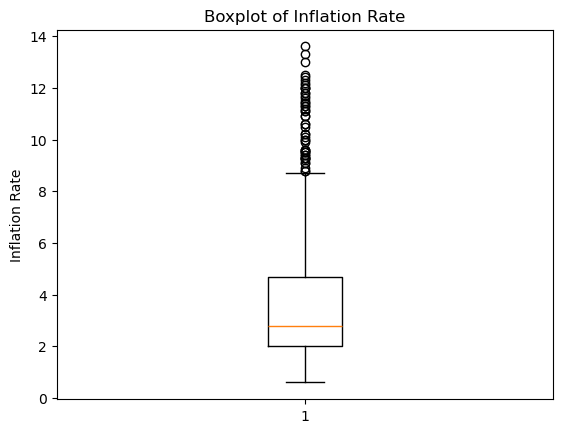

In [198]:
import matplotlib.pyplot as plt

plt.boxplot(df_interest_inflation_dropped['Inflation Rate'].dropna())
plt.title('Boxplot of Inflation Rate')
plt.ylabel('Inflation Rate')
plt.show()

In [199]:
Q1 = df_interest_inflation_dropped['Inflation Rate'].quantile(0.25)
Q3 = df_interest_inflation_dropped['Inflation Rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_interest_inflation_dropped[(df_interest_inflation_dropped['Inflation Rate'] < lower_bound) | 
                                         (df_interest_inflation_dropped['Inflation Rate'] > upper_bound)]

print(f"Outliers:\n{outliers}")


Outliers:
     Effective Federal Funds Rate  Inflation Rate       Date
240                         12.92             8.8 1974-07-01
241                         12.01             9.6 1974-08-01
242                         11.34            10.2 1974-09-01
243                         10.06            10.6 1974-10-01
244                          9.45            11.2 1974-11-01
245                          8.53            11.1 1974-12-01
246                          7.13            11.5 1975-01-01
247                          6.24            11.7 1975-02-01
248                          5.54            11.4 1975-03-01
249                          5.49            11.3 1975-04-01
250                          5.22            10.5 1975-05-01
251                          5.55             9.6 1975-06-01
252                          6.10             9.1 1975-07-01
295                         10.06             9.2 1979-02-01
296                         10.09             9.3 1979-03-01
297           

In [200]:
outliers.count()

Effective Federal Funds Rate    52
Inflation Rate                  52
Date                            52
dtype: int64

In [201]:
df_interest_inflation_dropped.tail(30)

,Effective Federal Funds Rate,Inflation Rate,Date
874,0.11,1.6,2015-01-01
875,0.11,1.7,2015-02-01
876,0.11,1.8,2015-03-01
877,0.12,1.8,2015-04-01
878,0.12,1.7,2015-05-01
879,0.13,1.8,2015-06-01
880,0.13,1.8,2015-07-01
881,0.14,1.8,2015-08-01
882,0.14,1.9,2015-09-01
883,0.12,1.9,2015-10-01


In [203]:
# Konverter til datetime og sæt som indeks (hvis ikke allerede gjort)
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])
df_sp500.set_index('Date', inplace=True)

# Resample til månedsstart
df_sp500_monthly = df_sp500.resample('MS').first()

# Reset indeks for at få "Date" som kolonne
df_sp500_monthly.reset_index(inplace=True)

# Nu burde "Date" være en almindelig kolonne igen
print(df_sp500_monthly.head())

        Date  Open      High       Low     Close  Adj Close    Volume
0 1962-01-01   0.0  3.553512  3.448997  3.475125   0.570977  254509.0
1 1962-02-01   0.0  3.573108  3.435932  3.553512   0.583857  319571.0
2 1962-03-01   0.0  3.520851  3.448997  3.475125   0.572706  139693.0
3 1962-04-01   0.0  3.651495  3.625366  3.644962   0.600695  116730.0
4 1962-05-01   0.0  3.422868  3.292224  3.403271   0.560864  359757.0


In [205]:
# funktion til at til at filtrere dataset efter 1962 og før 2017
def filter_df(df):
  filtered_df = df[(df['Date'] >= pd.Timestamp('1962-01-01')) & (df['Date'] < pd.Timestamp('2017-01-01'))]
  return filtered_df

In [206]:
sp500_filtered = filter_df(df_sp500_monthly)
infl_inter_filtered = filter_df(df_interest_inflation_dropped)

In [209]:
combined_df = pd.concat([sp500_filtered, infl_inter_filtered], ignore_index=True)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          1470 non-null   datetime64[ns]
 1   Open                          660 non-null    float64       
 2   High                          660 non-null    float64       
 3   Low                           660 non-null    float64       
 4   Close                         660 non-null    float64       
 5   Adj Close                     660 non-null    float64       
 6   Volume                        660 non-null    float64       
 7   Effective Federal Funds Rate  660 non-null    float64       
 8   Inflation Rate                660 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 103.5 KB


In [210]:
combined_df.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume,Effective Federal Funds Rate,Inflation Rate
0,1962-01-01,0.0,3.553512,3.448997,3.475125,0.570977,254509.0,NaN,NaN
1,1962-02-01,0.0,3.573108,3.435932,3.553512,0.583857,319571.0,NaN,NaN
2,1962-03-01,0.0,3.520851,3.448997,3.475125,0.572706,139693.0,NaN,NaN
3,1962-04-01,0.0,3.651495,3.625366,3.644962,0.600695,116730.0,NaN,NaN
4,1962-05-01,0.0,3.422868,3.292224,3.403271,0.560864,359757.0,NaN,NaN
5,1962-06-01,0.0,2.946018,2.776181,2.776181,0.457519,694637.0,NaN,NaN
6,1962-07-01,0.0,2.527958,2.443039,2.514893,0.414458,195187.0,NaN,NaN
7,1962-08-01,0.0,2.639005,2.586747,2.599812,0.428453,177965.0,NaN,NaN
8,1962-09-01,0.0,2.861099,2.776181,2.795778,0.462457,193274.0,NaN,NaN
9,1962-10-01,0.0,2.554087,2.462636,2.462636,0.407351,225805.0,NaN,NaN


### Data seams to be pretty clean and ready to use. There are no null or missing values. I only dropped on column called Ticker which has no influence in our project